In [1]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pdb
from Patch_ana import patch_pip
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
plt.style.use('classic')

% matplotlib inline
% load_ext autoreload
% autoreload 2

In [2]:
data= pd.read_csv('/data/Good data storage.csv')
data.head()

,File name,Age,Pip number,E-I,Reci,Artifact,IS100,Trial number before,Trial number after,Protocol,Elimi,Notes,Ptl_note
0,2016072704,27,3,0,0,0,1,"26,27,28,29","31,32,33,34,35",1,0,NaN,50Hz IE preonly
1,2017021501,30,3,0,0,0,2,"12,13","16,17",1,0,NaN,50Hz IE preonly
2,2016091403,30,2,0,0,0,1,"14,15","17,18",1,1,NaN,50Hz IE preonly
3,2017062202,24,1,0,0,0,1,"30,31,32","34,35",1,0,"No change, good data",50Hz IE preonly
4,2016072902,29,1,0,1,0,0,43,"45,46,47,48,49",1,0,NaN,50Hz IE preonly


In [3]:
data_post_50Hz_reci = data[(data['Ptl_note']=='50Hz EI postonly')&(data['Reci']==1)]
data_post_50Hz_uni = data[(data['Ptl_note']=='50Hz EI postonly')&(data['Reci']==0)]

In [4]:
data_post_50Hz_reci

,File name,Age,Pip number,E-I,Reci,Artifact,IS100,Trial number before,Trial number after,Protocol,Elimi,Notes,Ptl_note
35,2017032402,27,2,1,1,0,2,"9,10","12,13",4,16,Weak LTD,50Hz EI postonly
36,2017032701,30,1,1,1,0,2,"5,6,10,11","14,15,16,17,19,20,21",4,19,Strong LTD,50Hz EI postonly
37,2017032802,31,1,1,1,0,2,15,"17,18",4,7,"Weak LTD, no change on Rin",50Hz EI postonly
38,2017032905,32,2,1,1,0,2,"5,6",8,4,15,"No change, potential LTP",50Hz EI postonly
39,2017053102,34,2,1,1,0,1,7,"9,10,11,12",4,4,No change,50Hz EI postonly
172,2018032301,29,2,1,1,0,1,27,"29, 30, 31, 32,33",4,0,Weak LTD,50Hz EI postonly
175,2018032802,33,2,1,1,0,1,9,"12,13,14,15,16,17,18,19,20,21,22",4,0,Weak LTD,50Hz EI postonly


In [5]:
data_post_50Hz_reci.drop(35, inplace=True)

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [6]:
data_post_50Hz_uni

,File name,Age,Pip number,E-I,Reci,Artifact,IS100,Trial number before,Trial number after,Protocol,Elimi,Notes,Ptl_note
30,2017032401,27,2,1,0,0,2,"5,6,7","9,10",4,13,Strong LTD,50Hz EI postonly
31,2017032803,31,1,1,0,0,2,8,"10,12,13,14",4,0,"Weak LTD,no change on Rin",50Hz EI postonly
32,2017062304,25,1,1,0,0,1,"13,14,15,16","18, 19,20,21,22",4,0,"Strong LTD, careful analysis needed",50Hz EI postonly
33,2017062701,23,1,1,0,0,1,28,"30,31",4,0,Strong LTD,50Hz EI postonly
34,2017060803,31,1,1,0,0,1,"13,14",16,4,0,Strong LTD,50Hz EI postonly


/src/Patch_ana/Patch_ana/patch_pip.py:255: RuntimeWarning: invalid value encountered in double_scalars
  output['PPR'] = output['resp2_amp'] / output['resp1_amp']
/src/Patch_ana/Patch_ana/patch_pip.py:83: RuntimeWarning: divide by zero encountered in double_scalars
  ir = 0.005 / np.mean(trial_demean[ir_region]) * 1e-6 - 20


<Container object of 3 artists>

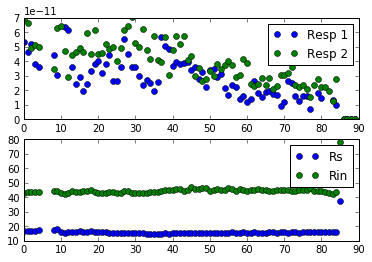

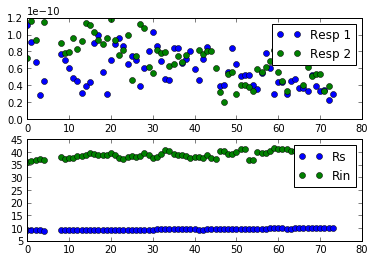

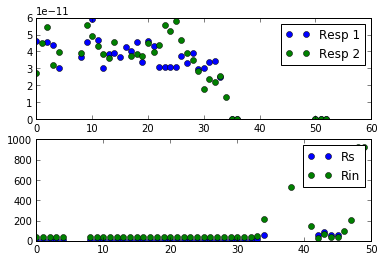

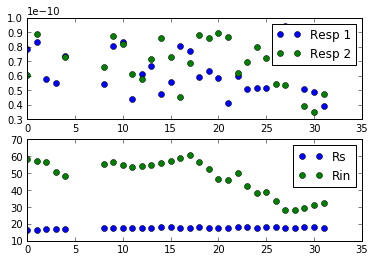

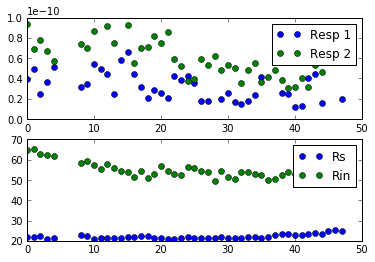

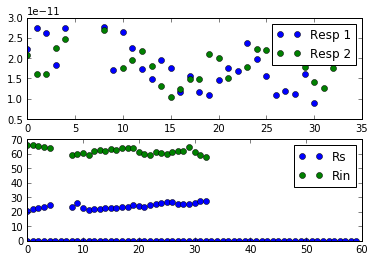

In [7]:
# patch_pip.df_ana(data_post_50Hz_reci,'/data/data_post_EI_50Hz_reci', end_ana=[60,60,20,20,40,30])
patch_pip.df_ana(data_post_50Hz_reci,'/data/data_post_EI_50Hz_reci')
post_50Hz_reci = pd.read_pickle('/data/data_post_EI_50Hz_reci')
ave_ptl_mean, ave_ptl_ste = patch_pip.sample_plot(post_50Hz_reci)
plt.errorbar(x=np.arange(len(ave_ptl_mean)), y=ave_ptl_mean, yerr=ave_ptl_ste, fmt='bo')

In [8]:
post_50Hz_reci['Before'].index

Int64Index([36, 37, 38, 39, 172, 175], dtype='int64')

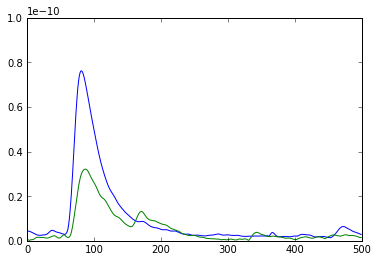

In [9]:
sample_id = 37
plt.plot(np.nanmean(np.vstack(post_50Hz_reci['Before'].loc[sample_id]['trace_y1'])[:, :500], axis=0))
plt.plot(np.nanmean(np.vstack(post_50Hz_reci['After'].loc[sample_id]['trace_y1'])[-5:,:500], axis=0))

plt.ylim([0, 1e-10])
with PdfPages('/data/Figure3_3.pdf') as pdf:
    pdf.savefig()

In [10]:
elimi = np.array([60,60,20,20,40,30])
elimi_sr = pd.Series(elimi, index=post_50Hz_reci.index)
post_50Hz_reci['elimi']=elimi_sr

In [11]:
# joint_sr = pd.Series(joint_sr, index=post_50Hz_reci.index)
post_50Hz_reci.to_pickle('/data/ana_post_EI_50Hz_reci')

<Container object of 3 artists>

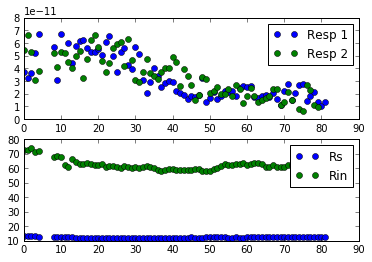

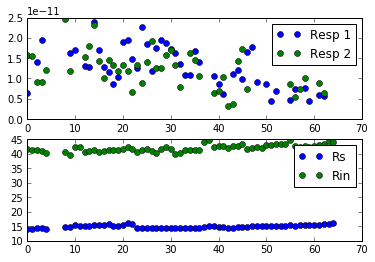

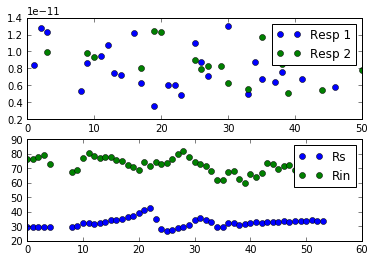

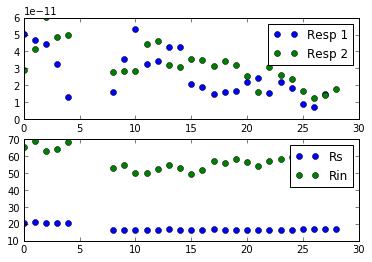

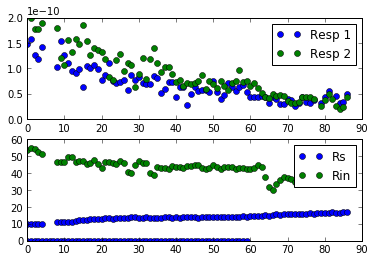

In [12]:
patch_pip.df_ana(data_post_50Hz_uni,'/data/data_post_EI_50Hz_uni')
post_50Hz_uni = pd.read_pickle('/data/data_post_EI_50Hz_uni')
ave_ptl_mean, ave_ptl_ste = patch_pip.sample_plot(post_50Hz_uni)
plt.errorbar(x=np.arange(len(ave_ptl_mean)), y=ave_ptl_mean, yerr=ave_ptl_ste, fmt='bo')

In [13]:
post_50Hz_uni = pd.read_pickle('/data/data_post_EI_50Hz_uni')

In [14]:
elimi = np.array([70,50,45,25,50])
elimi_sr = pd.Series(elimi, index=post_50Hz_uni.index)
post_50Hz_uni['elimi']=elimi_sr

In [15]:
post_50Hz_uni

,Before,After,File name,elimi
30,"{'trace_y2': [[2.52094921959e-13, 6.3155085959...","{'trace_y2': [[1.15229543951e-12, 1.0534223596...",2017032401,70
31,"{'trace_y2': [[1.68185344923e-12, 1.4840017668...","{'trace_y2': [[8.12168817367e-13, 7.6380459675...",2017032803,50
32,"{'trace_y2': [[2.39008164e-13, 2.61726102641e-...","{'trace_y2': [[1.09888536097e-12, 1.2067546300...",2017062304,45
33,"{'trace_y2': [[3.01329593021e-13, 2.2207950082...","{'trace_y2': [[1.73896347147e-12, 1.3144565141...",2017062701,25
34,"{'trace_y2': [[1.17232830936e-12, 1.3483789330...","{'trace_y2': [[9.20002355635e-13, 7.7946199850...",2017060803,50


In [16]:
# joint_sr = pd.Series(joint_sr, index=post_50Hz_reci.index)
post_50Hz_uni.to_pickle('/data/ana_post_EI_50Hz_uni')